<a href="https://colab.research.google.com/github/venkateshblks/Logistic-Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
bank=pd.read_csv('bank-full.csv',delimiter=';')
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [36]:
bank.shape


(45211, 17)

In [37]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [38]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [39]:

bank['y'] = bank['y'].map({'yes':1, 'no':0})
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [40]:
print(bank['contact'].unique())
bank['poutcome'].unique()

['unknown' 'cellular' 'telephone']


array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [41]:
bank['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [42]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
bank['job']= label_encoder.fit_transform(bank['job'])
bank['marital']= label_encoder.fit_transform(bank['marital'])
bank['education']= label_encoder.fit_transform(bank['education'])
bank['default']= label_encoder.fit_transform(bank['default'])
bank['housing']= label_encoder.fit_transform(bank['housing'])
bank['contact']= label_encoder.fit_transform(bank['contact'])
bank['loan']= label_encoder.fit_transform(bank['loan'])
bank['month']= label_encoder.fit_transform(bank['month'])
bank['poutcome']= label_encoder.fit_transform(bank['poutcome'])

bank.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [43]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [44]:
bank.dropna()
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [45]:
# Dividing our data into input and output variables
X = bank.iloc[:,:-1]
Y = bank.iloc[:,-1]
print(Y.shape)
X.shape

(45211,)


(45211, 16)

In [46]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted': classifier.predict(X)})
y_pred_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [49]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
confusion_matrix

array([[39279,   643],
       [ 4437,   852]])

In [50]:
y_pred_df["predicted"].value_counts()

0    43716
1     1495
Name: predicted, dtype: int64

In [51]:
y_pred_df["actual"].value_counts()

0    39922
1     5289
Name: actual, dtype: int64

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [53]:
classifier.predict_proba(X)

array([[0.94851339, 0.05148661],
       [0.94884452, 0.05115548],
       [0.94693621, 0.05306379],
       ...,
       [0.67167394, 0.32832606],
       [0.94032647, 0.05967353],
       [0.58156337, 0.41843663]])

In [54]:
classifier.intercept_

array([-0.07052832])

In [55]:
classifier.coef_

array([[-3.16927654e-02,  1.45940589e-02, -9.21323098e-02,
        -1.31764472e-02, -4.79434706e-03,  4.00428561e-05,
        -1.81623436e-01, -5.35131143e-02, -1.86772854e-01,
        -8.42355503e-03, -5.99403301e-02,  3.27148816e-03,
        -2.67073009e-01, -1.23720685e-03,  1.20010031e-01,
        -1.80593800e-01]])

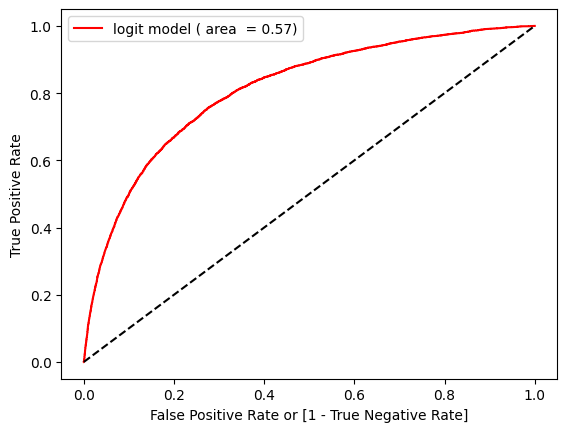

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [57]:
import statsmodels.api as sm
model1 =  sm.Logit(Y,X)
model1.fit().summary()

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Wed, 20 Mar 2024   Pseudo R-squ.:                  0.2342
Time:                        14:31:03   Log-Likelihood:                -12495.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0235      0.001    -18.322      0.000      -0.026      -0.021
job           -0.0157      0.005     -3.051      0.002      -0.026      -0.006
marital       -0.1877      0.026     -7.181      0.000      -0.239      -0.136
education      0.0308      0.022      1.389      0.165      -0.013       0.074
default       -0.4022      0.159     -2.534      0.011      -0.713      -0.091
balance     1.978e-05   4.51e-06      4.381      0.000    1.09e-05    2.86e-05
housing       -1.2719      0.037    -34.810      0.000      -1.343      -1.200
loan          -0.8290      0.056    -14.696      0.000      -0.940      -0.718
contact       -0.5961      0.027    -22.449      0.000      -0.648      -0.544
day           -0.0169      0.002     -8.524      0.000      -0.021      -0.013
month          0.0054      0.005      1.013      0.311      -0.005       0.016
duration       0.0038   6.01e-05     63.105      0.000       0.004       0.004
campaign      -0.1682      0.011    -15.928      0.000      -0.189      -0.147
pdays          0.0002      0.000      0.878      0.380      -0.000       0.001
previous       0.0548      0.008      6.879      0.000       0.039       0.070
poutcome      -0.2257      0.022    -10.244      0.000      -0.269      -0.183
==============================================================================
"""

In [58]:
table=pd.DataFrame({'Fpr':fpr,'tpr':tpr,'thresholds':thresholds})
table.loc[(table.tpr>=0.4) & (table.Fpr<=0.6)]

,Fpr,tpr,thresholds
2307,0.065979,0.400076,0.263975
2308,0.066104,0.400076,0.263725
2309,0.066104,0.400265,0.263695
2310,0.066254,0.400265,0.263510
2311,0.066254,0.400454,0.263486
...,...,...,...
6903,0.598893,0.925506,0.060573
6904,0.599068,0.925506,0.060553
6905,0.599068,0.925695,0.060545
6906,0.599344,0.925695,0.060511


In [59]:
prob=classifier.predict_proba (X)[:,1]
y_newpred=[]
for i in prob:
  if i>=0.25:
    y_newpred.append(1)
  else:
    y_newpred.append(0)
y_newpred_df= pd.DataFrame({'actual': Y,
                         'predicted':y_newpred })
y_newpred_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [60]:
print(classification_report(Y,y_newpred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     39922
           1       0.44      0.42      0.43      5289

    accuracy                           0.87     45211
   macro avg       0.68      0.68      0.68     45211
weighted avg       0.87      0.87      0.87     45211



In [61]:
roc_auc_score(Y, y_pred)

0.5724913226281891

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, y_pred)

0.8876379642122493

In [63]:
roc_auc_score(Y, y_newpred)

0.6756353680563845

In [64]:
accuracy_score(Y, y_newpred)

0.8683285041251023